In [1]:
# introduction to sklearn

# 0. An end-to-end Scikit-Learn Workflow

In [2]:
import pandas as pd

heart_disease = pd.read_csv('https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/heart-disease.csv')

heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


# 1. Get data ready

In [3]:
# create X (feature matrix)
X = heart_disease.drop('target', axis=1)

# the code above is dropping the column of the labels we want to predict. axis=1 specifies we want to drop the "target" column for every row (row-wise axis)

# create y (labels)
y = heart_disease['target']

# 2 Choose the right model (known as estimator in sklearn)

In [4]:
# we are going to use a randomforest model becuase this problem is a classification problem (heart disease or not)

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)

# we'll keep the default hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

# 3. Fit the model to the training data

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# the above line means 80% of the data is going to be used for training

In [6]:
clf.fit(X_train, y_train)

RandomForestClassifier()

make a prediction

In [7]:
import numpy as np

# testing model on test data features
y_preds = clf.predict(X_test)

y_test


181    0
148    1
92     1
143    1
78     1
      ..
84     1
217    0
269    0
226    0
41     1
Name: target, Length: 61, dtype: int64

# 4. evaluate the model

In [8]:
# testing the 
clf.score(X_test, y_test)

#label predicting accuracy on test data

0.7868852459016393

In [9]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# how well does the model classify based on test data
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.81      0.78      0.79        32
           1       0.77      0.79      0.78        29

    accuracy                           0.79        61
   macro avg       0.79      0.79      0.79        61
weighted avg       0.79      0.79      0.79        61



In [10]:
confusion_matrix(y_test, y_preds)

array([[25,  7],
       [ 6, 23]])

In [11]:
accuracy_score(y_test, y_preds)

0.7868852459016393

# 5. improve the model

In [12]:
# try to improve model with a different amount of n_estimators (a hyperparamter)

np.random.seed(42)

for i in range(10,100,10):
  print(f"Trying model with {i} estimators...")
  clf = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
  print(f"Model accuracy on test set: {clf.score(X_test, y_test) * 100: .2f}")
  print(" ")


Trying model with 10 estimators...
Model accuracy on test set:  75.41
 
Trying model with 20 estimators...
Model accuracy on test set:  83.61
 
Trying model with 30 estimators...
Model accuracy on test set:  80.33
 
Trying model with 40 estimators...
Model accuracy on test set:  80.33
 
Trying model with 50 estimators...
Model accuracy on test set:  78.69
 
Trying model with 60 estimators...
Model accuracy on test set:  81.97
 
Trying model with 70 estimators...
Model accuracy on test set:  81.97
 
Trying model with 80 estimators...
Model accuracy on test set:  80.33
 
Trying model with 90 estimators...
Model accuracy on test set:  78.69
 


# 6. save a model and laod it

In [13]:
import pickle

# saves model (where??)
pickle.dump(clf, open('random_forest_model_1.pkl', 'wb'))

loaded_model = pickle.load(open('random_forest_model_1.pkl', 'rb'))
loaded_model.score(X_test, y_test)

0.7868852459016393



---

In [14]:
# standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## 1. getting our data ready to be used with machine learning

Three main things we have to do:
  1. split the data into features and labels (usually x and y)
  2. filling (also called imputing) or disregarding missing values
  3. converting non-numerical values to numerical values (feature encoding)

## 1.1 make sure data is all numerical

In [15]:
car_sales = pd.read_csv("https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/car-sales-extended.csv")

car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043


In [16]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [17]:
# split into X/y

X = car_sales.drop("Price", axis=1)
y = car_sales["Price"]

# split into training and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [18]:
# build machine learning model 
from sklearn.ensemble import RandomForestRegressor
# a random forest regression model

# model = RandomForestRegressor()
# model.fit(X_train, y_train)
# model.score(X_test, y_test)

In [19]:
# turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Doors']
#door is a category because multiple instances can fit into that one category

one_hot = OneHotEncoder()
# one-hot encoding the X features
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder='passthrough')
transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [20]:
# the new, one-hot-encoded, data
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [21]:
# Another way to one-hot-encode with pandas

dummies = pd.get_dummies(car_sales[['Make', 'Colour', 'Doors']])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [22]:
# now refit the model since its encoded

#makes the results reproducable
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2 )

# model.fit(X_train, y_train)

In [23]:
# score
# model.score(X_test, y_test)

---

# What to do with missing values

1. fill them with some value (imputation)
2. remove the samples with missing data altogether

In [24]:
# import dataset with missign dataset
car_sales_mising = pd.read_csv('https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/car-sales-extended-missing-data.csv')

car_sales_mising.head()

#check if theres missing data; shows how many missing (NaNs) there are. apparently current versions of one-hot-encoding can work with NaNs automatically
car_sales_mising.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [25]:
# create x and y

X = car_sales_mising.drop('Price', axis=1)
y = car_sales_mising['Price']

In [26]:
# this will work with the current version of onehotencoder

# turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Doors']
#door is a category because multiple instances can fit into that one category

one_hot = OneHotEncoder()
# one-hot encoding the X features
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder='passthrough')
transformed_X = transformer.fit_transform(X)
transformed_X

<1000x16 sparse matrix of type '<class 'numpy.float64'>'
	with 4000 stored elements in Compressed Sparse Row format>

In [27]:
# Option 2: Fill missing data with pandas

# fill the make column with "missing"
car_sales_mising['Make'].fillna('missing', inplace=True)

# fill the colour column
car_sales_mising['Colour'].fillna('missing', inplace=True)

# fill the odometer column with the average
car_sales_mising['Odometer (KM)'].fillna(car_sales_mising['Odometer (KM)'].mean(), inplace=True)

# fill the 'Doors' column with 4
car_sales_mising['Doors'].fillna(4, inplace=True)

car_sales_mising.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [28]:
# remove rows with missing price value
car_sales_mising.dropna(inplace=True)

car_sales_mising.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [29]:
X = car_sales_mising.drop('Price', axis=1)
y = car_sales_mising['Price']

# this will work with the current version of onehotencoder

# turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ['Make', 'Colour', 'Doors']
#door is a category because multiple instances can fit into that one category

one_hot = OneHotEncoder()
# one-hot encoding the X features
transformer = ColumnTransformer([("one_hot", one_hot, categorical_features)], remainder='passthrough')
transformed_X = transformer.fit_transform(X)
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

---

# 2. Choosing the right estimator/algorithm

* estimator = model = algorithm
* classification problem - predicting a category
  * clf
* regression problem - predicting a number

* you can alwasy refer back to sklearn map

### 2.1 picking a model for regression problem

let's use the california housing dataset

In [30]:
# get cali housing dataset

from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

#turn housing into a datafram
housing_df = pd.DataFrame(housing['data'])
housing_df


,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [31]:
# add median price column to datafram by getting the 'target' list from housing
housing_df['target'] = housing['target']
# housing_df = housing_df.drop('MedHouseVal', axis=1)
housing_df.head()


,0,1,2,3,4,5,6,7,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [32]:
# Import algorithm
from sklearn.linear_model import Ridge

# setup random seed for reproducibility
np.random.seed(42)

# create the data (X, y)
X = housing_df.drop('target', axis=1)
y = housing_df['target'] # median house price in $100,000s

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# instantiate and fit the model (on the training set)
model = Ridge()
model.fit(X_train, y_train)

# check the score of the model (on the test set)
model.score(X_test, y_test) # this is giving us an R^2 value (how linearly related the two variables are)

0.5758549611440126

In [33]:
# What if Ridge didnt work or the score didnt fit our needs? We can try a different regression model

# we are going to try an ensemble model (a combo of smaller moderls to make better preds than a single one. check documentation)

# randomforest regressor is a popular ensemble model

In [34]:
# import the randomforestregressormodel calss from the ensemble module
from sklearn.ensemble import  RandomForestRegressor

# setup random seed for reproducibility
np.random.seed(42)

# create the data
X = housing_df.drop('target', axis=1)
y = housing_df['target']

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

#create random forest model
model = RandomForestRegressor()
model.fit(X_train, y_train)

#check the score of the model
model.score(X_test, y_test)

0.8066196804802649

---
# Choosing a model for a classification problem

In [35]:
heart_disease = pd.read_csv('https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/heart-disease.csv')

heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [36]:
# map says to try linearSVC

# import linearsvc estimator class
from sklearn.svm import LinearSVC

# setup random seed for reproducibility
np.random.seed(42)

# make the data
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# split the data 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# instantiate linearsvc
clf = LinearSVC(max_iter=10000)
clf.fit(X_train, y_train)

# evaluate the lienar svc
clf.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


0.8688524590163934

In [37]:

# import RandomForestClassifier estimator class
from sklearn.ensemble import RandomForestClassifier

# setup random seed for reproducibility
np.random.seed(42)

# make the data
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# split the data 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# instantiate randomforestclassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# evaluate the lienar svc
clf.score(X_test, y_test)

0.8524590163934426

* Tidbit:
  1. if you have structured data, use ensemble methods
  2. if you have unstructured data, use deep learning of transfer learning

# 3.2 Making Predictions with our model!

2 ways to make predictions:
  1. predict()
  2. predict_proba()

In [38]:
y_preds = clf.predict(X_test)

In [39]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_preds)

0.8524590163934426

In [40]:
# make predictions with predict_proba()

# predict_proba() returns probibilities of a classification moadel

clf.predict_proba(X_test[:5]) # giving the probability of the label being true/false

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [41]:
# predict can also be used for regression models
housing_df.head()

,0,1,2,3,4,5,6,7,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [42]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# create the data
X= housing_df.drop('target', axis=1)
y = housing_df['target']

# split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

# create model instance 
model = RandomForestRegressor()

# fit model to the data
model.fit(X_train, y_train)

# make prediction 
y_preds = model.predict(X_test)

In [43]:
y_preds[:10]

array([0.49384  , 0.75494  , 4.9285964, 2.54029  , 2.33176  , 1.6549701,
       2.34323  , 1.66182  , 2.47489  , 4.8344779])

In [44]:
np.array(y_test[:10])

array([0.477  , 0.458  , 5.00001, 2.186  , 2.78   , 1.587  , 1.982  ,
       1.575  , 3.4    , 4.466  ])

In [45]:
len(y_preds)

4128

In [46]:
len(y_test)

4128

In [47]:
# compare the predictions to the truth
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

0.3265721842781009

this means that predicted values are on average 0.3266 different from test values

## 4. Evaluating a machine learning model

Three ways to evaluate scikit-learn models/estimators
  1. estimators built in score() method
  2. the scoring parameter
  3. problem specific metric functions

### 4.1 Evaluating a model with the `score()` method

In [48]:
from sklearn.ensemble import RandomForestClassifier

#setup random seed
np.random.seed(42)

# make the data 
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# initiate random forest classifier
clf = RandomForestClassifier(n_estimators=100)

# fit the model to the data (training the ML model)
clf.fit(X_train, y_train)

RandomForestClassifier()

In [49]:
# the highest value for the .score() method is 1.0 and the lowest is 0.0
clf.score(X_train, y_train)
# score on train should be at or near 1.0

1.0

In [50]:
clf.score(X_test, y_test)

0.8524590163934426

In [51]:
# Use Score method on regression
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

# create the data
X = housing_df.drop('target', axis=1)
y = housing_df['target']

# split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# create the model instance
model = RandomForestRegressor(n_estimators=100)

# fit the model to the data
model.fit(X_train, y_train)


RandomForestRegressor()

In [52]:
# the default score() evaluation metric is r_squared for regression algorithms
# highest = 1.0, lowest = 0.0
model.score(X_test, y_test)

0.8066196804802649

### 4.2 Evaluating a model using the scoring parameter

In [53]:
from sklearn.ensemble import RandomForestClassifier

#setup random seed
np.random.seed(42)

# make the data 
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# initiate random forest classifier
clf = RandomForestClassifier(n_estimators=100)

# fit the model to the data (training the ML model)
clf.fit(X_train, y_train)

RandomForestClassifier()

In [54]:
clf.score(X_test, y_test)

0.8524590163934426

In [55]:
from sklearn.model_selection import cross_val_score

cross_val_score(clf, X, y, cv=5)
# cv = 5 splits set into 5 unique test/train sets

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [56]:
cross_val_score(clf, X,y, cv=10)

array([0.90322581, 0.80645161, 0.87096774, 0.9       , 0.86666667,
       0.8       , 0.73333333, 0.86666667, 0.73333333, 0.8       ])

In [57]:
np.random.seed(42)

# single training and test split score
clf_single_score = clf.score(X_test, y_test)

# take the mean of the 5-fold cross validation score
clf_cross_val_score = np.mean(cross_val_score(clf, X, y, cv=5))

# compare the two
clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

### 4.2.1 Classification Model Evaluation Metrics

1. Accuracy 
2. Area under ROC curve
3. confusion matrix
4. classification report

**Accuracy**

In [58]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

clf = RandomForestClassifier(n_estimators=100)
cross_val_score = cross_val_score(clf, X, y, cv=5)

In [59]:
np.mean(cross_val_score)

0.8248087431693989

In [60]:
print(f"Heart disease classifier cross-validated accuracy: {np.mean(cross_val_score)*100:.2f}%")

Heart disease classifier cross-validated accuracy: 82.48%


**Area under the receiver operating characteristic curve (AUC/ROC)**

* Area under curve
* ROC curver

ROC curves are a comparison of a model's true positive rate (TPR) versus a models false positive rate (FPR)

* True positive = model predicts a 1 when the true value is a 1

In [61]:
from sklearn.metrics import roc_curve

# create test/train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# fit the classifier
clf.fit(X_train, y_train)


# make predictions with probabilities 
y_probs = clf.predict_proba(X_test)

y_probs[:10]

array([[0.51, 0.49],
       [0.17, 0.83],
       [0.51, 0.49],
       [0.72, 0.28],
       [0.43, 0.57],
       [0.12, 0.88],
       [0.3 , 0.7 ],
       [0.97, 0.03],
       [0.15, 0.85],
       [0.4 , 0.6 ]])

In [62]:
# gets the probability of being positive for heart disease (positive probabilities are in the second column)
y_probs_positive = y_probs[:,1]
y_probs_positive[:10]

array([0.49, 0.83, 0.49, 0.28, 0.57, 0.88, 0.7 , 0.03, 0.85, 0.6 ])

In [63]:
# calculate fpr, tpr, and threshholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# check the false positive rates
fpr

array([0.        , 0.03448276, 0.03448276, 0.03448276, 0.03448276,
       0.03448276, 0.03448276, 0.06896552, 0.06896552, 0.06896552,
       0.10344828, 0.10344828, 0.13793103, 0.13793103, 0.13793103,
       0.20689655, 0.20689655, 0.20689655, 0.27586207, 0.37931034,
       0.37931034, 0.48275862, 0.48275862, 0.55172414, 0.55172414,
       1.        ])

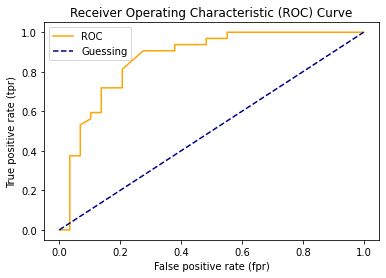

In [64]:
# create a function for plotting ROC curves
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
  """
  Plots a ROC curve given the false positive rate (fpr) and
  true positive rate (trp) of a model.
  """

  # plot roc curve
  plt.plot(fpr, tpr, color='orange', label="ROC")
  # plot line with no predictive power (baseline)
  plt.plot([0,1], [0,1], color='darkblue', linestyle='--', label="Guessing")

  # customize the plot 
  plt.xlabel("False positive rate (fpr)")
  plt.ylabel("True positive rate (tpr)")
  plt.title("Receiver Operating Characteristic (ROC) Curve")
  plt.legend()
  plt.show()

plot_roc_curve(fpr, tpr)

In [65]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

# makes auc score you can get is a 1.0. That means curve has 0 fpr, and 1 tpr, so the curve has a 90º corner

0.8669181034482759

**Confusion Matrix**

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict.
In essence, giving you an idea of where the model is getting confused

In [66]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[23,  6],
       [ 6, 26]])

In [67]:
# Visualize confusion matrix with pd.crosstab()
pd.crosstab(y_test, y_preds, rownames=['Actual Labels'], colnames=['Predicted Labels'])
# going to show how many predictions were 0 and actual labels were 0... etc

Predicted Labels,0,1
Actual Labels,,
0,23,6
1,6,26


In [68]:
22 + 7+8+24

61

In [69]:
len(y_preds)

61

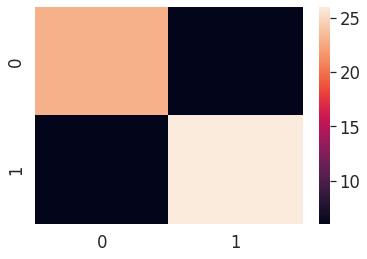

In [70]:
# make our confusion matrix with seaborn heatmap
import seaborn as sns

# set the font scale
sns.set(font_scale=1.5)

# create a confusion matrix
conf_mat = confusion_matrix(y_test, y_preds)

# plot it using seaborn
sns.heatmap(conf_mat)

**Classification Report**

In [71]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.79      0.79      0.79        29
           1       0.81      0.81      0.81        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



### 4.2 Regression Evaluation Metrics

The ones we're going to cover are:
1. R^2 (coefficient of determination)
2. Mean absolute error (MAE)
3. MEan squared error (MSE)

In [72]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop('target', axis=1)
y = housing_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

RandomForestRegressor()

In [73]:
from sklearn.metrics import r2_score

# how to use the r2_score function, but you obviously wouldnt use the y_teest set as the predictions
r2_score(y_true=y_test,
      y_pred=y_test)

1.0

***Mean Absolute Error (MAE)***

MAE is the average of the absolute differences between predictions and actual values

It gives you an idea of how wrong your model's predictions are

In [74]:
# MAE
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test,y_preds)
mae

# the outpute number indicates that on average our prediction is +/- 0.3265.. from the actual test value 

0.3265721842781009

In [75]:
df = pd.DataFrame(data={'actual values': y_test,
                  'predicted values': y_preds})
df['differences'] = df['predicted values'] - df['actual values']

df.head(10)

,actual values,predicted values,differences
20046,0.47700,0.493840,0.016840
3024,0.45800,0.754940,0.296940
15663,5.00001,4.928596,-0.071414
20484,2.18600,2.540290,0.354290
9814,2.78000,2.331760,-0.448240
13311,1.58700,1.654970,0.067970
7113,1.98200,2.343230,0.361230
7668,1.57500,1.661820,0.086820
18246,3.40000,2.474890,-0.925110
5723,4.46600,4.834478,0.368478


In [76]:
# the same as MAE
np.abs(df['differences']).mean()

0.3265721842781009

***Mean squared Error (MSE)***

MSE is the mean of the square of the errors between actual and predicted values

In [77]:
# Mean squared error
from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
mse

0.2534073069137548

In [78]:
# check why mse is less than mae

df['squared_differences'] = np.square(df['differences'])
df.head()

# calculate MSE by hand
squared = np.square(df['differences'])
squared.mean()

#mse amplifies big differences becuase it is squaring them. is is usually bigger than mae, but not in this case


0.2534073069137548

Refere to section nine, video 136 for slide with when and where to use what evaluation metrics

### Finally using the `scoring` parameter

In [79]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

clf = RandomForestClassifier(n_estimators=100)

In [80]:
np.random.seed(42)

# cross-validation accuracy (this is going to be a 5-fold cross val, cv=5)
cv_acc = cross_val_score(clf, X, y, cv=5, scoring=None) # scoring = none will set the default scoring method, which is accuracy for regression
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [81]:
 # cross-validated accuracy
 print(f"The cross-validated accuracy is: {np.mean(cv_acc)*100:.2f}%")

The cross-validated accuracy is: 82.48%


In [82]:
# precision 
np.random.seed(42)
cv_precision = cross_val_score(clf, X, y, cv=5, scoring='precision')
cv_precision

array([0.82352941, 0.93548387, 0.84848485, 0.79411765, 0.76315789])

In [83]:
# Cross-validated precision
print(f"The cross-validated precision is: {np.mean(cv_precision)}")

The cross-validated precision is: 0.8329547346025924


In [84]:
# Recall
np.random.seed(42)
cv_recall = cross_val_score(clf, X, y, cv=5, scoring='recall')
cv_recall

array([0.84848485, 0.87878788, 0.84848485, 0.81818182, 0.87878788])

In [85]:
# cross-validated recall
print(f"The cross-validated recall is: {np.mean(cv_recall)}")

The cross-validated recall is: 0.8545454545454545


Let's see `scoring` parameter used for regression problems

In [86]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop('target', axis=1)
y = housing_df['target']

model = RandomForestRegressor(n_estimators=100)

In [87]:
np.random.seed(42)
cv_r2 = cross_val_score(model, X, y, cv=3, scoring=None) # default scoring is coeff. of determination (r^2)
np.mean(cv_r2)

0.6545756342466266

In [88]:
# mean squared error
cv_mse = cross_val_score(model, X, y, cv=3, scoring='neg_mean_squared_error') # the neg means negated and allows the score to follow the convention of higher is better
np.mean(cv_mse)

-0.46281833778669723

In [89]:
# mean absolute error
cv_mae = cross_val_score(model, X, y, cv=3, scoring='neg_mean_absolute_error')
np.mean(cv_mae)

-0.4820332646560079

## 4.3 Using different evaluation metrics as SCikit-LEarn Functions


In [90]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

# create X & y
X = heart_disease.drop('target', axis=1)
y = heart_disease['target']

# split the data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)


# Create model
clf = RandomForestClassifier()

# Fit model
clf.fit(X_train, y_train)

# Make predictions
y_preds = clf.predict(X_test)

# Evaluate model using evaluation functions
print('Classifier metrics on the test set')
print(f"Accuracy: {accuracy_score(y_test, y_preds)*100:.2f}%")
print(f"Precision: {precision_score(y_test, y_preds)}")
print(f"Recall: {recall_score(y_test, y_preds)}")
print(f"F1: {f1_score(y_test, y_preds)}")



Classifier metrics on the test set
Accuracy: 85.25%
Precision: 0.8484848484848485
Recall: 0.875
F1: 0.8615384615384615


In [91]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

# create X & 
X = housing_df.drop('target', axis=1)
y = housing_df['target']

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Create model
model = RandomForestRegressor()

# Fit model
model.fit(X_train, y_train)

# Make predictions 
y_preds = model.predict(X_test)

# Evaluate model using evaluation functions
print('Regression metrics on the test set')
print(f"R2 score: {r2_score(y_test, y_preds)}")
print(f"MAE score: {mean_absolute_error(y_test, y_preds)}")
print(f"MSE score: {mean_squared_error(y_test, y_preds)}")

Regression metrics on the test set
R2 score: 0.8066196804802649
MAE score: 0.3265721842781009
MSE score: 0.2534073069137548


## 5. Improving a Model

First predictions = baseline predictions
First model = baseline model

From a data perspective:
* could we collect more data? (more data -> better)
* Could we improve our data? (more features for each sample?)

From a model perspective:
* is there a better model we could use?
* could we improve the current model?

Parameters = model find these patterns in data
Hyperparameters = settings on a model you can adjust to (potentially) improve its ability to find patters

Three ways to adjust hyperparameters:
1. by hand
2. randomly with RandomSearchCV
3. exhaustively with GridSearchCV

In [92]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

In [93]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 5.1 tuning hyperparameters by hand

W're going to try and adjust
* max_depth
* max_features
* min_samples_leaf
* min_samples_split
* n_estimators

In [94]:
def evaluate_preds(y_true, y_preds):
  '''
  Performs evaluation comparison on y_true labels vs y_pred labels
  on a classification
  '''

  accuracy = accuracy_score(y_true, y_preds)
  precision = precision_score(y_true, y_preds)
  recall = recall_score(y_true, y_preds)
  f1 = f1_score(y_true, y_preds)
  metric_dict = {'accuracy': round(accuracy,2),
                 'precision': round(precision,2),
                 'recall': round(recall,2),
                 'f1': round(f1,2)}
  print(f'Acc: {accuracy*100:.2f}%')
  print(f'Precision: {precision*100:.2f}%')
  print(f'Recall: {recall*100:.2f}%')
  print(f'F1 Score: {f1*100:.2f}%')

  return metric_dict



In [95]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Shuffle the data
heart_disease_shuffled = heart_disease.sample(frac=1)

# split into X & y
X = heart_disease_shuffled.drop('target', axis=1)
y = heart_disease_shuffled['target']

# split the data into train, validation, & test sets
train_split = round(0.7 * len(heart_disease_shuffled)) # 70% of data
valid_split = round(train_split + .15*len(heart_disease_shuffled)) # 15% of data
X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]

len(X_train), len(X_valid), len(X_test)

# we tune our model on the validation set

(212, 45, 46)

In [96]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# make baseline predictions 
y_preds = clf.predict(X_valid)

# evaluate the classifier on validation set
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

Acc: 82.22%
Precision: 81.48%
Recall: 88.00%
F1 Score: 84.62%


{'accuracy': 0.82, 'precision': 0.81, 'recall': 0.88, 'f1': 0.85}

In [97]:
np.random.seed(42)

# create a second classifier with different hyperparameters
clf_2 = RandomForestClassifier(n_estimators=100) # last time n_estim = 10
clf_2.fit(X_train, y_train)

# make predictions with differenet hyperparameters
y_preds_2 = clf_2.predict(X_valid)

# evaluate the 2nd classifier
clf_2_metrics = evaluate_preds(y_valid, y_preds_2)

Acc: 82.22%
Precision: 84.00%
Recall: 84.00%
F1 Score: 84.00%


### 5.2 Hyperparameter tuning with RandomizedSearchCV

In [98]:
from sklearn.model_selection import RandomizedSearchCV

grid = {'n_estimators': [10,100,200,500,1000,1200],
        'max_depth': [None, 5,10,20,30],
        'max_features': ['auto','sqrt'],
        'min_samples_split': [2,4,6],
        'min_samples_leaf': [1,2,4]
        }

np.random.seed(42)

# split into X & y
X = heart_disease_shuffled.drop('target', axis=1)
y = heart_disease_shuffled['target']

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# instantiate RandomForestClassifier
clf = RandomForestClassifier(n_jobs=1)

# setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator = clf,
                            param_distributions=grid,
                            n_iter=10, # number of models to try. will try 10 random combinations of hyperparameters
                            cv=5,
                            verbose=2)

# fit the randomizedsearchcv version of clf
rs_clf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.7s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.6s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.2s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=1200; total time=   2.5s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.2s
[CV] END max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=1),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

In [99]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 6,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [110]:
# by default, making predictions is done with the best hyperparameters
rs_y_preds = rs_clf.predict(X_test)

# evaluate the predictions
rs_metrics = evaluate_preds(y_test, rs_y_preds)

# this didnt improve the model, which sometiems happens, but we can run more permutations to try and find idela hyperparamters by boosting the n_iter value

Acc: 81.97%
Precision: 77.42%
Recall: 85.71%
F1 Score: 81.36%


### Hyperparameter Tuning with GridSearchCV

In [101]:
grid
# this goes though every hyperparameter combination, unlike random search cv which goes through a spedcified number of random combos

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [104]:
# have a grid that goes through the best paramters from rnadomCV to limit computing power grid needs
grid_2 = {'n_estimators': [100, 200, 500],
        'max_depth': [None],
        'max_features': ['auto', 'sqrt'],
        'min_samples_split': [6],
        'min_samples_leaf': [1, 2]}

In [115]:
from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(42)

# split into X & y
X = heart_disease_shuffled.drop('target', axis=1)
y = heart_disease_shuffled['target']

# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

# # instantiate RandomForestClassifier
# clf = RandomForestClassifier(n_jobs=1)

# # setup GridSearchCV
# gs_clf = GridSearchCV(estimator = clf,
#                             param_grid=grid_2,
#                             cv=5,
#                             verbose=2)

# # fit the randomizedsearchcv version of clf
# gs_clf.fit(X_train, y_train)

In [106]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 200}

In [108]:
gs_y_preds = gs_clf.predict(X_test)

# evaluate the predictions
gs_metrics = evaluate_preds(y_test, gs_y_preds)

Acc: 78.69%
Precision: 74.19%
Recall: 82.14%
F1 Score: 77.97%


Let's compare our different model metrics.

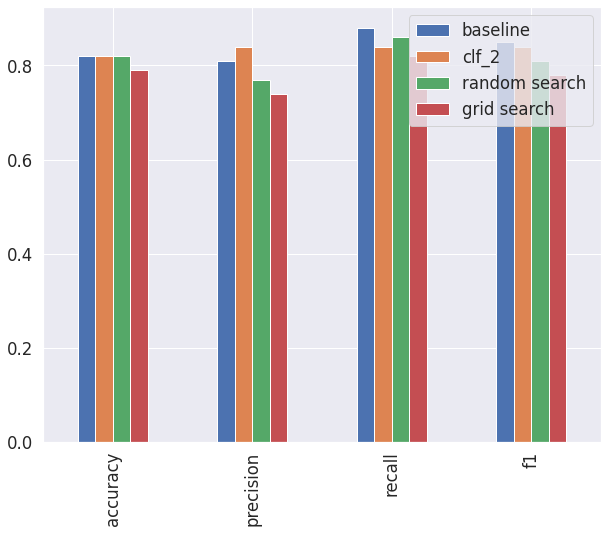

In [111]:
compare_metrics = pd.DataFrame({'baseline': baseline_metrics,
                                'clf_2': clf_2_metrics,
                                'random search': rs_metrics,
                                'grid search': gs_metrics})

compare_metrics.plot.bar(figsize=(10,8))

## 6. Saving and Loading Trained ML Models

Two ways to save and load ML models:
1. with python's pickle module
2. with the joblib module

**Pickle**

In [112]:
import pickle

# save an existing model to file
pickle.dump(gs_clf, open('gs_random_random_forest_model_1.pkl', 'wb'))

In [114]:
# Load a saved model
loaded_pickle_model = pickle.load(open('gs_random_random_forest_model_1.pkl', 'rb'))

In [118]:
# make some prediction
pickle_y_preds = loaded_pickle_model.predict(X_test)
evaluate_preds(y_test, pickle_y_preds)

Acc: 78.69%
Precision: 74.19%
Recall: 82.14%
F1 Score: 77.97%


{'accuracy': 0.79, 'precision': 0.74, 'recall': 0.82, 'f1': 0.78}

**Joblib**

In [119]:
from joblib import dump, load
# joblib is technically more desirable for scikit learn models
# save model to file
dump(gs_clf, filename='gs_random_forest_model_1.joblib')

['gs_random_forest_model_1.joblib']

In [122]:
# import a saved joblib model 
loaded_joblib_model = load(filename='gs_random_forest_model_1.joblib')

In [123]:
# make and evaluate joblib prediction
joblib_y_preds = loaded_joblib_model.predict(X_test)
evaluate_preds(y_test, joblib_y_preds)

Acc: 78.69%
Precision: 74.19%
Recall: 82.14%
F1 Score: 77.97%


{'accuracy': 0.79, 'precision': 0.74, 'recall': 0.82, 'f1': 0.78}